# <center style='color:deeppink'> `Hierarchical` clustering - Example using `wine` dataset</center>

## 1. Import required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

## 2. Load `wine` dataset

In [2]:
wine = datasets.load_wine()
data = wine.data
targets = wine.target

In [3]:
data.shape # 178 samples and 13 features

(178, 13)

In [4]:
wine.feature_names # the names of 13 features

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names # the names of targets

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

So, there are three different targets.

## 3. Create a dataframe

In [6]:
df = pd.DataFrame(data, columns=wine.feature_names)
df['target_names'] = targets # add targets to the dataframe
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df.target_names.value_counts()

1    71
0    59
2    48
Name: target_names, dtype: int64

So, `class_0`, `class_1` and `class_2` are present 59, 71 and 48 times, respectively in the __wine__ dataset.

In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_names
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 4. Select some dominant features

In [9]:
new_df = df[['alcohol', 'alcalinity_of_ash', 'magnesium', 'color_intensity', 'proline']]
new_df.head()

,alcohol,alcalinity_of_ash,magnesium,color_intensity,proline
0,14.23,15.6,127.0,5.64,1065.0
1,13.20,11.2,100.0,4.38,1050.0
2,13.16,18.6,101.0,5.68,1185.0
3,14.37,16.8,113.0,7.80,1480.0
4,13.24,21.0,118.0,4.32,735.0


In [10]:
new_df.shape

(178, 5)

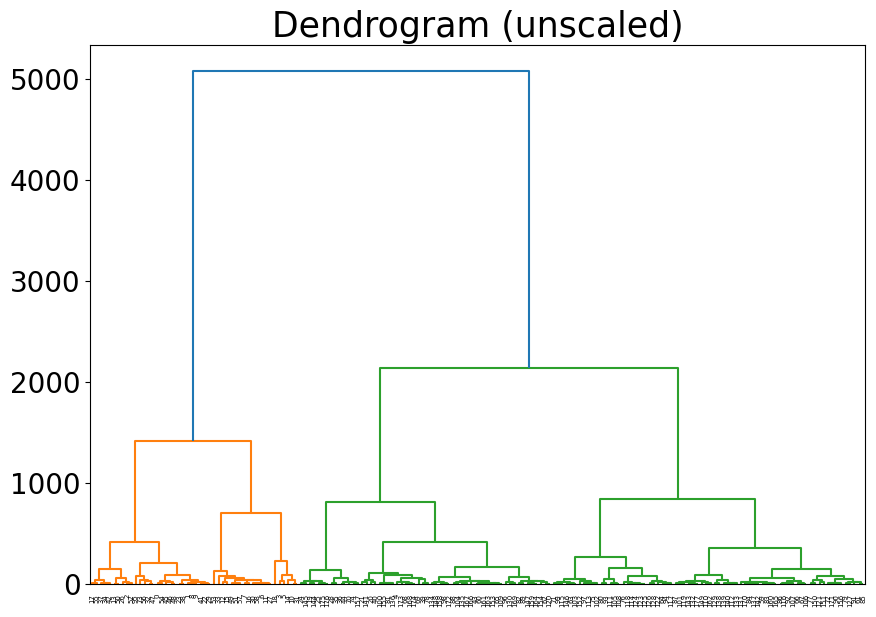

In [11]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram (unscaled)', fontsize=25)
plt.yticks(fontsize=20)
d_unscaled = dendrogram(linkage(new_df, method='ward'))

__Dendrogram__ is basically a tree like structure that gives us an idea of how many clusters can exist within dataset. We have _three classes_ but we can only see two major groups from the `dendrogram` shown above. If we don't scale the features, we might get a biased result.

## 5. Perform preprocessing

In [12]:
scaler = StandardScaler()
scaled = scaler.fit_transform(new_df) 

In [13]:
scaled.shape # same shape as 'new_df'

(178, 5)

## 6. Scaled dataframe

In [14]:
df_scaled = pd.DataFrame(scaled, columns=new_df.columns)
df_scaled.head()

,alcohol,alcalinity_of_ash,magnesium,color_intensity,proline
0,1.518613,-1.169593,1.913905,0.251717,1.013009
1,0.246290,-2.490847,0.018145,-0.293321,0.965242
2,0.196879,-0.268738,0.088358,0.269020,1.395148
3,1.691550,-0.809251,0.930918,1.186068,2.334574
4,0.295700,0.451946,1.281985,-0.319276,-0.037874


In [15]:
df_scaled.shape

(178, 5)

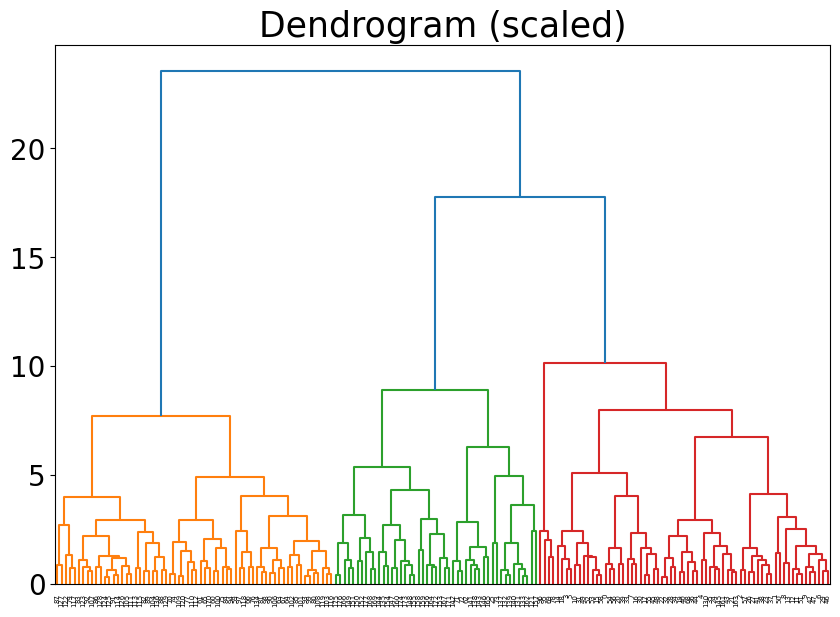

In [16]:
plt.figure(figsize=(10, 7))
plt.title('Dendrogram (scaled)', fontsize=25)
plt.yticks(fontsize=20)
d_unscaled = dendrogram(linkage(df_scaled, method='ward'))

After scaling our features, we can now see three major groups from the `dendrogram`.

## 7. Perform `hierarchical_clustering` considering 3 clusters

In [17]:
agg = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
agg.fit(df_scaled)
preds = agg.labels_

## 8. Add two new columns to the scaled dataframe

In [18]:
df_scaled['ground_truth'] = targets
df_scaled['prediction'] = preds
df_scaled.head()

,alcohol,alcalinity_of_ash,magnesium,color_intensity,proline,ground_truth,prediction
0,1.518613,-1.169593,1.913905,0.251717,1.013009,0,0
1,0.246290,-2.490847,0.018145,-0.293321,0.965242,0,0
2,0.196879,-0.268738,0.088358,0.269020,1.395148,0,0
3,1.691550,-0.809251,0.930918,1.186068,2.334574,0,0
4,0.295700,0.451946,1.281985,-0.319276,-0.037874,0,0


In [19]:
df_scaled.shape

(178, 7)

In [20]:
print(df_scaled.ground_truth.unique())
print(df_scaled.prediction.unique())

[0 1 2]
[0 2 1]


## 9. Clustering comparison between ground truths and predictions

In [21]:
cm = metrics.confusion_matrix(targets, preds)

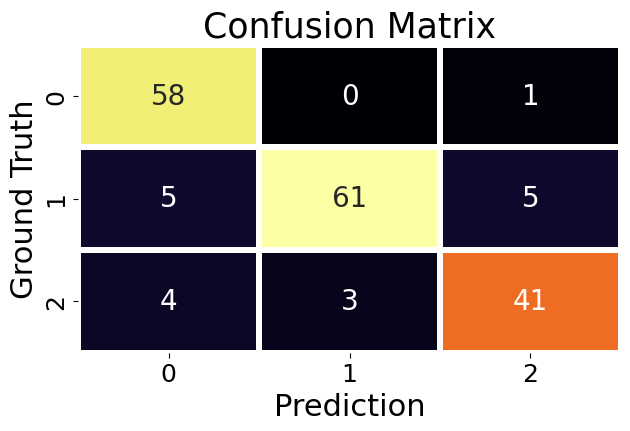

In [22]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', linewidth=4, cbar=False, annot_kws={'size': 20}, cmap='inferno')

plt.xlabel('Prediction', fontsize=22)
plt.ylabel('Ground Truth', fontsize=22)
plt.title('Confusion Matrix', fontsize=25)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

## 10. Measure a few external validation metrics

In [23]:
print('Adjusted Rand Index (ARI):', round(metrics.adjusted_rand_score(targets, preds), 5))
print('Fowlkes-Mallows Score (FMS):', round(metrics.fowlkes_mallows_score(targets, preds), 5))

Adjusted Rand Index (ARI): 0.72062
Fowlkes-Mallows Score (FMS): 0.8149
